<a href="https://colab.research.google.com/github/casbjr/Python-Pocket-itau/blob/master/Pocket_Ita%C3%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Curso Pocket Itaú Tecnologia - Python

<p align=center><img src="https://media-exp1.licdn.com/dms/image/C4E22AQG9a3K3POmqjw/feedshare-shrink_1280/0?e=1600905600&v=beta&t=qEsG0rPU7TLauSzJSmjAP0-gzZjIAUZMAZldfMEyOZs" width="700px"></p>

Este notebook possui o conteúdo do curso pocket de Python, oferecido pelo Itaú, e ministrado pelo Nivaldo Teixeira e Yuri Souza, em 2020-06-12.

Esse curso apresentou algumas das técnicas de análise exploratória de dados. A ideia era ter insights à partir de um dataset sobre o COVID pelo mundo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#df = pd.read_excel('/content/COVID-19-geographic-disbtribution-worldwide-2020-06-10.xlsx')
df = pd.read_csv('https://raw.githubusercontent.com/casbjr/Python-Pocket-itau/master/COVID-19-geographic-disbtribution-worldwide-2020-06-10.csv', sep=';', decimal='.')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,10/06/2020,10,6,2020,542,15,Afghanistan,AF,AFG,37172386.0,Asia
1,09/06/2020,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
2,08/06/2020,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia
3,07/06/2020,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia
4,06/06/2020,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df[['day','countriesAndTerritories']]

,day,countriesAndTerritories
0,10,Afghanistan
1,9,Afghanistan
2,8,Afghanistan
3,7,Afghanistan
4,6,Afghanistan
...,...,...
22587,25,Zimbabwe
22588,24,Zimbabwe
22589,23,Zimbabwe
22590,22,Zimbabwe


In [5]:
brasil = df[df['countriesAndTerritories']=='Brazil']
brasil.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
2942,10/06/2020,10,6,2020,32091,1272,Brazil,BR,BRA,209469333.0,America
2943,09/06/2020,9,6,2020,15654,679,Brazil,BR,BRA,209469333.0,America
2944,08/06/2020,8,6,2020,18921,525,Brazil,BR,BRA,209469333.0,America
2945,07/06/2020,7,6,2020,27075,904,Brazil,BR,BRA,209469333.0,America
2946,06/06/2020,6,6,2020,30830,1005,Brazil,BR,BRA,209469333.0,America


## Data com maior numero de mortes e casos
## média de mortes e casos diário
## taxa média de mortalidade diária


In [6]:
mundo = df

In [7]:
mundo['cases'].max()

48529

In [8]:
mundo[mundo['cases']==mundo['cases'].max()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
21700,26/04/2020,26,4,2020,48529,2172,United_States_of_America,US,USA,327167434.0,America


In [9]:
mundo[mundo['deaths']==mundo['deaths'].max()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
21710,16/04/2020,16,4,2020,30148,4928,United_States_of_America,US,USA,327167434.0,America


#### média de mortes e casos diários



In [10]:
mundo['cases'].mean()

319.1599681303116

In [11]:
mundo['deaths'].mean()

18.20091182719547

In [12]:
mundoMin50casos = mundo[mundo['cases']>50]

In [13]:
mundoMin50casos['cases'].mean()

1231.821972318339

#### taxa média de mortalidade diária


In [14]:
mundoMin50casos['taxa_mortalidade'] = mundoMin50casos['deaths'].div(mundoMin50casos['cases'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
mundoMin50casos.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,taxa_mortalidade
0,10/06/2020,10,6,2020,542,15,Afghanistan,AF,AFG,37172386.0,Asia,0.027675
1,09/06/2020,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia,0.020870
2,08/06/2020,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia,0.037927
3,07/06/2020,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia,0.030928
4,06/06/2020,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia,0.009836


In [16]:
mundoMin50casos.drop(columns=['taxa_mortalidade'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
mundoMin50casos.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,10/06/2020,10,6,2020,542,15,Afghanistan,AF,AFG,37172386.0,Asia
1,09/06/2020,9,6,2020,575,12,Afghanistan,AF,AFG,37172386.0,Asia
2,08/06/2020,8,6,2020,791,30,Afghanistan,AF,AFG,37172386.0,Asia
3,07/06/2020,7,6,2020,582,18,Afghanistan,AF,AFG,37172386.0,Asia
4,06/06/2020,6,6,2020,915,9,Afghanistan,AF,AFG,37172386.0,Asia


In [18]:
brasilMin50casos = brasil[brasil['cases']>50]

In [19]:
brasilMin50casos.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
2942,10/06/2020,10,6,2020,32091,1272,Brazil,BR,BRA,209469333.0,America
2943,09/06/2020,9,6,2020,15654,679,Brazil,BR,BRA,209469333.0,America
2944,08/06/2020,8,6,2020,18921,525,Brazil,BR,BRA,209469333.0,America
2945,07/06/2020,7,6,2020,27075,904,Brazil,BR,BRA,209469333.0,America
2946,06/06/2020,6,6,2020,30830,1005,Brazil,BR,BRA,209469333.0,America


#### Comparando países

In [20]:
brasilMin50casos.describe()

,day,month,year,cases,deaths,popData2018
count,86.000000,86.000000,86.0,86.000000,86.000000,86.0
mean,15.988372,4.418605,2020.0,8597.069767,446.581395,209469333.0
std,9.177330,0.913495,0.0,9337.527495,411.656438,0.0
min,1.000000,3.000000,2020.0,57.000000,0.000000,209469333.0
25%,8.000000,4.000000,2020.0,1165.000000,69.250000,209469333.0
50%,16.500000,4.000000,2020.0,4791.500000,351.500000,209469333.0
75%,24.000000,5.000000,2020.0,14675.250000,750.500000,209469333.0
max,31.000000,6.000000,2020.0,33274.000000,1473.000000,209469333.0


In [21]:
mundoMin50casos.describe()

,day,month,year,cases,deaths,popData2018
count,5780.000000,5780.000000,5780.0,5780.000000,5780.000000,5.780000e+03
mean,15.537024,4.472837,2020.0,1231.821972,70.543426,8.534690e+07
std,9.181950,0.940958,0.0,3504.887843,232.892618,2.234980e+08
min,1.000000,1.000000,2020.0,51.000000,-86.000000,3.000000e+03
25%,7.000000,4.000000,2020.0,111.000000,2.000000,9.485386e+06
50%,15.000000,5.000000,2020.0,267.000000,7.000000,2.573930e+07
75%,24.000000,5.000000,2020.0,804.250000,30.000000,6.648899e+07
max,31.000000,6.000000,2020.0,48529.000000,4928.000000,1.392730e+09


In [22]:
#Lift
brasilMin50casos.describe()/mundoMin50casos.describe()

,day,month,year,cases,deaths,popData2018
count,0.014879,0.014879,0.014879,0.014879,0.014879,0.014879
mean,1.029050,0.987875,1.000000,6.979150,6.330588,2.454328
std,0.999497,0.970814,NaN,2.664144,1.767580,0.000000
min,1.000000,3.000000,1.000000,1.117647,-0.000000,69823.111000
25%,1.142857,1.000000,1.000000,10.495495,34.625000,22.083375
50%,1.100000,0.800000,1.000000,17.945693,50.214286,8.138112
75%,1.000000,1.000000,1.000000,18.247125,25.016667,3.150436
max,1.000000,1.000000,1.000000,0.685652,0.298904,0.150402


In [23]:
Numerodecasosmaximodiario = brasilMin50casos['cases'].max()

In [24]:
mediaMortalidade = brasilMin50casos['deaths'].mean()/brasilMin50casos['cases'].mean()

In [25]:
mediaMortalidade

0.05194576843380924

In [26]:
print('O número máximo de casos diário em um único dia no Brasil foi: {:,} \nA taxa de mortalidade do Brasil neste periodo foi de {:.2%}.'\
      .format(Numerodecasosmaximodiario,mediaMortalidade))

O número máximo de casos diário em um único dia no Brasil foi: 33,274 
A taxa de mortalidade do Brasil neste periodo foi de 5.19%.


### Casos Diarios Ao Longo Do Tempo

In [27]:
listaPaises = ['Brazil','France', 'Argentina','United_Kingdom','United_States_of_America','Italy']

In [28]:
%matplotlib inline

In [29]:
#indices - data, colunas - paises, valor - casos
mundoPlot = mundoMin50casos.pivot(index='dateRep',columns='countriesAndTerritories', values='cases')

In [30]:
mundoPlot.head()

countriesAndTerritories,Afghanistan,Algeria,Andorra,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Belarus,Belgium,Benin,Bolivia,Bosnia_and_Herzegovina,Brazil,Bulgaria,Cameroon,Canada,Cases_on_an_international_conveyance_Japan,Central_African_Republic,Chad,Chile,China,Colombia,Costa_Rica,Cote_dIvoire,Croatia,Cuba,Cyprus,Czechia,Democratic_Republic_of_the_Congo,Denmark,Djibouti,Dominican_Republic,Ecuador,Egypt,El_Salvador,Equatorial_Guinea,Estonia,...,Paraguay,Peru,Philippines,Poland,Portugal,Puerto_Rico,Qatar,Romania,Russia,Sao_Tome_and_Principe,Saudi_Arabia,Senegal,Serbia,Sierra_Leone,Singapore,Slovakia,Slovenia,Somalia,South_Africa,South_Korea,South_Sudan,Spain,Sri_Lanka,Sudan,Sweden,Switzerland,Tajikistan,Thailand,Tunisia,Turkey,Uganda,Ukraine,United_Arab_Emirates,United_Kingdom,United_Republic_of_Tanzania,United_States_of_America,Uzbekistan,Venezuela,Zambia,Zimbabwe
dateRep,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01/02/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2095.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/03/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01/04/2020,NaN,132.0,NaN,NaN,NaN,150.0,564.0,NaN,52.0,NaN,NaN,876.0,NaN,NaN,60.0,1138.0,NaN,51.0,1112.0,NaN,NaN,NaN,289.0,54.0,108.0,NaN,NaN,77.0,NaN,NaN,306.0,NaN,283.0,NaN,208.0,336.0,NaN,NaN,NaN,NaN,...,NaN,115.0,NaN,256.0,1035.0,65.0,88.0,293.0,501.0,NaN,110.0,NaN,159.0,NaN,NaN,NaN,51.0,NaN,NaN,NaN,NaN,7413.0,NaN,NaN,407.0,696.0,NaN,NaN,NaN,2704.0,NaN,69.0,53.0,3009.0,NaN,24998.0,NaN,NaN,NaN,NaN
01/05/2020,222.0,158.0,NaN,143.0,134.0,NaN,60.0,NaN,119.0,564.0,846.0,660.0,NaN,57.0,101.0,7218.0,59.0,NaN,1649.0,NaN,NaN,NaN,1138.0,NaN,296.0,NaN,NaN,NaN,NaN,NaN,103.0,72.0,150.0,NaN,320.0,259.0,269.0,NaN,NaN,NaN,...,NaN,3045.0,276.0,237.0,295.0,106.0,845.0,262.0,7099.0,NaN,1351.0,51.0,285.0,NaN,528.0,NaN,NaN,NaN,297.0,NaN,NaN,1387.0,NaN,67.0,790.0,179.0,NaN,NaN,NaN,2615.0,NaN,540.0,552.0,6032.0,NaN,29917.0,NaN,NaN,NaN,NaN
01/06/2020,680.0,127.0,NaN,637.0,355.0,NaN,NaN,248.0,605.0,2545.0,898.0,195.0,NaN,390.0,NaN,16409.0,NaN,NaN,757.0,NaN,NaN,NaN,4830.0,NaN,1147.0,NaN,NaN,NaN,NaN,NaN,NaN,83.0,NaN,160.0,377.0,527.0,1536.0,NaN,NaN,NaN,...,NaN,8805.0,862.0,215.0,297.0,58.0,1648.0,124.0,9268.0,NaN,1877.0,110.0,NaN,NaN,518.0,NaN,NaN,60.0,1716.0,NaN,NaN,209.0,NaN,226.0,429.0,NaN,NaN,NaN,NaN,839.0,NaN,468.0,661.0,1936.0,NaN,19807.0,108.0,51.0,NaN,NaN


In [31]:
mundoPlot = mundoPlot.loc[:,listaPaises]

In [32]:
mundoPlot.head()

countriesAndTerritories,Brazil,France,Argentina,United_Kingdom,United_States_of_America,Italy
dateRep,,,,,,
01/02/2020,NaN,NaN,NaN,NaN,NaN,NaN
01/03/2020,NaN,NaN,NaN,NaN,NaN,240.0
01/04/2020,1138.0,7578.0,NaN,3009.0,24998.0,4053.0
01/05/2020,7218.0,1139.0,143.0,6032.0,29917.0,1872.0
01/06/2020,16409.0,257.0,637.0,1936.0,19807.0,355.0


In [33]:
mundoPlot.fillna(0,inplace=True)

In [34]:
mundoPlot.head()

countriesAndTerritories,Brazil,France,Argentina,United_Kingdom,United_States_of_America,Italy
dateRep,,,,,,
01/02/2020,0.0,0.0,0.0,0.0,0.0,0.0
01/03/2020,0.0,0.0,0.0,0.0,0.0,240.0
01/04/2020,1138.0,7578.0,0.0,3009.0,24998.0,4053.0
01/05/2020,7218.0,1139.0,143.0,6032.0,29917.0,1872.0
01/06/2020,16409.0,257.0,637.0,1936.0,19807.0,355.0


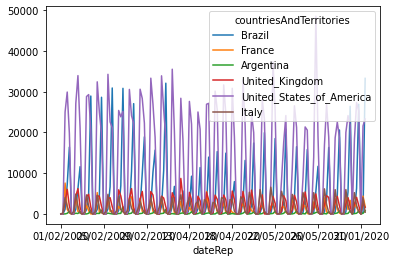

In [35]:
mundoPlot.plot()

In [36]:
plt.style.use('seaborn')

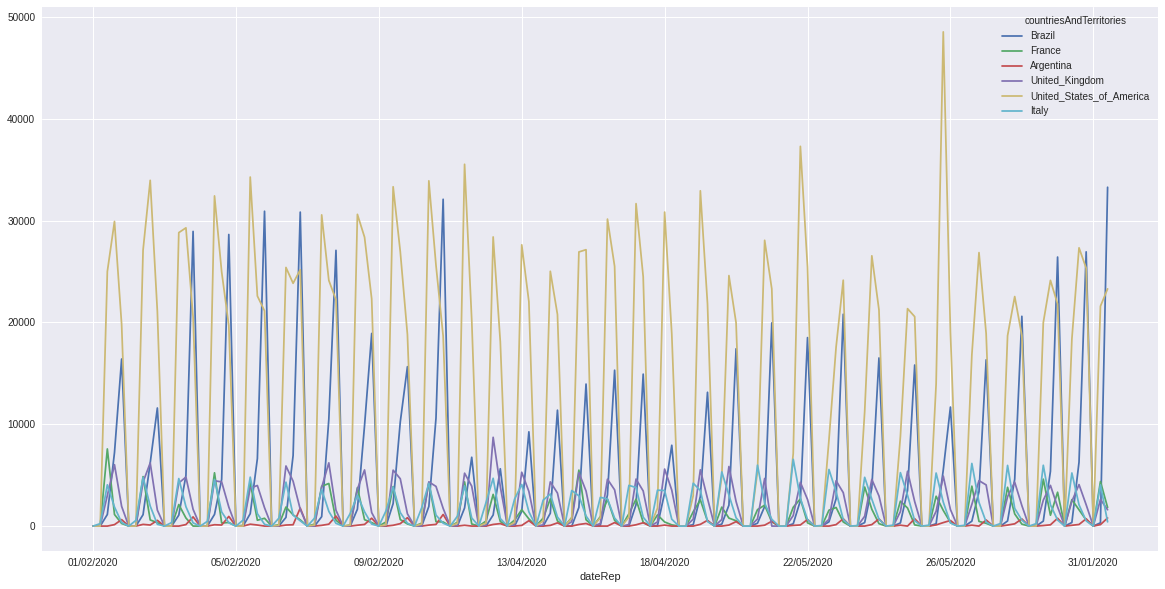

In [37]:
mundoPlot.plot(figsize=(20,10))